In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import matplotlib as mpl
import matplotlib.image


In [2]:
def plot_subimages(rgb):
    cmaps = ['Reds','Blues','Greens']
 
    fig, axes = plt.subplots(nrows=1,ncols=3,dpi=200)
    for c, col, ax in zip(rgb, cmaps, axes.flat):
        # get vmin, vmax 
        lo, hi = np.percentile(c[:], (45,99))
        ax.imshow(c.T,cmap=col,norm=mpl.colors.LogNorm(vmin=lo,vmax=hi),origin='lower')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

def load_image(r_filename,g_filename,b_filename):
    # read data
    image_r = fits.open(r_filename)[0].data
    image_g = fits.open(g_filename)[0].data
    image_b = fits.open(b_filename)[0].data
    # stack
    rgb = (np.dstack((image_r,image_g,image_b)))
    
    return rgb.T

def rescale(rgb, intensity_range):
    # initialize new_out
    rgb_rescaled = np.zeros(rgb.shape)
    
    for i, c in enumerate(rgb):
        lo, hi = np.percentile(c[:], (intensity_range[0],intensity_range[1]))
        rgb_rescaled[i] = rescale_intensity(c, in_range=(lo, hi))
    return rgb_rescaled.T


In [3]:
r_filename = '/global/u2/a/autumnaw/curveball/rfitsCOSMOS2_42.coadd.fits'
g_filename = '/global/u2/a/autumnaw/curveball/gfitsCOSMOS2_42.coadd.fits'
b_filename = '/global/u2/a/autumnaw/curveball/ifitsCOSMOS2_42.coadd.fits'


rgb = load_image(r_filename,g_filename,b_filename)

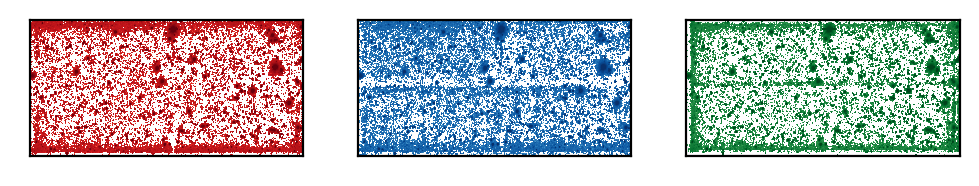

In [4]:
plot_subimages(rgb)

In [4]:
# scale the values to be within the same percentiles
rgb_rescaled = rescale(rgb,[30,99.])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


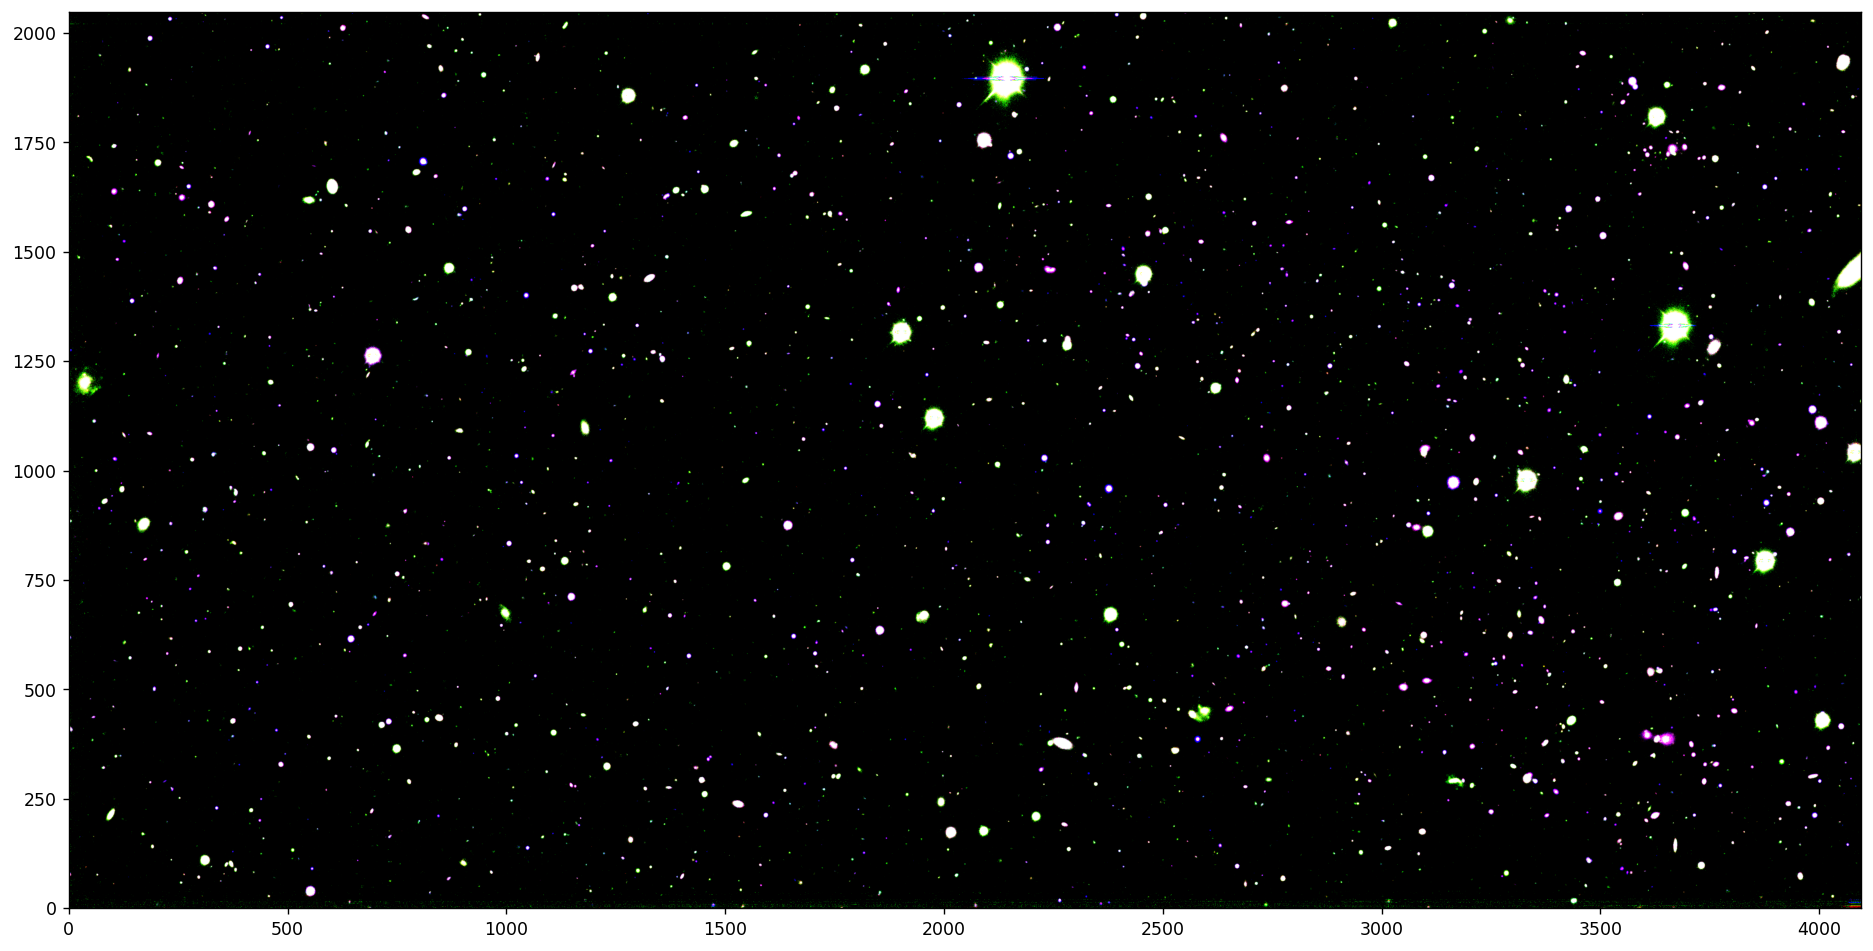

In [5]:
image_r = fits.open(r_filename)[0].data
image_g = fits.open(g_filename)[0].data
image_b = fits.open(b_filename)[0].data



plt.figure(figsize=[18.5,10.5],dpi=125)
rgb = (np.dstack((image_r,image_g,image_b)))
plt.imshow(rgb_rescaled, origin='lower')
